<a href="https://colab.research.google.com/github/seanrote/neural_networks/blob/master/cifar10optimized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf

In [6]:
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout, Input, Conv2D, Dense, Flatten, GlobalMaxPooling2D,MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [7]:
cifar_10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar_10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 
y_train, y_test = y_train.flatten(), y_test.flatten()

print("x_train.shape:", x_train.shape)
print("x_train.shape:", y_train.shape )

170498071/170498071 [==============================] - 2s 0us/step
x_train.shape: (50000, 32, 32, 3)
x_train.shape: (50000,)


In [8]:
K = len(set(y_train))
print("Number of classes:", K)

Number of classes: 10


In [9]:
i  = Input(shape=x_train[0].shape)

x = Conv2D(32, (3,3),activation='relu', padding = 'same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64, (3,3), activation='relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3),activation='relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [10]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 27s 9ms/step - loss: 1.2744 - accuracy: 0.5642 - val_loss: 1.0751 - val_accuracy: 0.6270
Epoch 2/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8221 - accuracy: 0.7143 - val_loss: 0.7235 - val_accuracy: 0.7547
Epoch 3/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6663 - accuracy: 0.7698 - val_loss: 0.7736 - val_accuracy: 0.7512
Epoch 4/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5728 - accuracy: 0.8056 - val_loss: 0.9136 - val_accuracy: 0.7226
Epoch 5/15
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4867 - accuracy: 0.8319 - val_loss: 0.6429 - val_accuracy: 0.7842
Epoch 6/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4047 - accuracy: 0.8602 - val_loss: 0.7015 - val_accuracy: 0.7790
Epoch 7/15
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3427 - accuracy: 0.8807 - val_loss: 0.5715 - val_ac

In [11]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip= True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs= 50)

Epoch 1/50


<ipython-input-11-85b3e3b38b9a>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs= 50)


1562/1562 [==============================] - 37s 23ms/step - loss: 0.5939 - accuracy: 0.8076 - val_loss: 0.5693 - val_accuracy: 0.8163
Epoch 2/50
1562/1562 [==============================] - 35s 23ms/step - loss: 0.4919 - accuracy: 0.8364 - val_loss: 0.4930 - val_accuracy: 0.8388
Epoch 3/50
1562/1562 [==============================] - 35s 22ms/step - loss: 0.4504 - accuracy: 0.8483 - val_loss: 0.5194 - val_accuracy: 0.8319
Epoch 4/50
1562/1562 [==============================] - 35s 23ms/step - loss: 0.4220 - accuracy: 0.8573 - val_loss: 0.5526 - val_accuracy: 0.8258
Epoch 5/50
1562/1562 [==============================] - 35s 22ms/step - loss: 0.4018 - accuracy: 0.8617 - val_loss: 0.4403 - val_accuracy: 0.8568
Epoch 6/50
1562/1562 [==============================] - 35s 22ms/step - loss: 0.3840 - accuracy: 0.8689 - val_loss: 0.4880 - val_accuracy: 0.8443
Epoch 7/50
1562/1562 [==============================] - 35s 22ms/step - loss: 0.3752 - accuracy: 0.8710 - val_loss: 0.4315 - val_accura

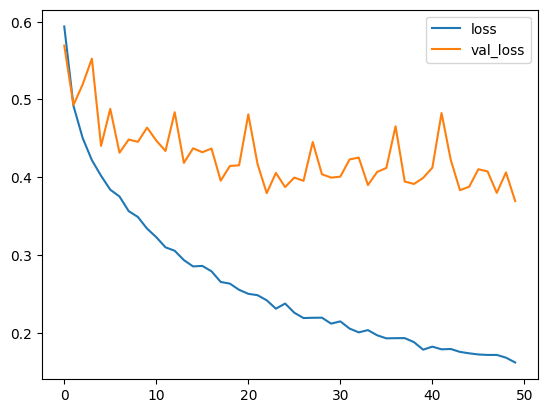

In [12]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()


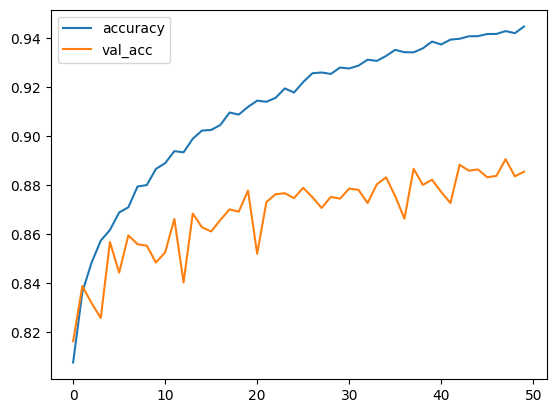

In [13]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

313/313 [==============================] - 1s 2ms/step
confusion matrix without normalization
[[915   6  16  12   4   0   4   5  19  19]
 [  4 953   0   1   0   2   3   0   3  34]
 [ 33   0 834  43  26  27  24   5   3   5]
 [  8   5  29 793  23  83  37   7   3  12]
 [  6   1  21  31 869  24  29  17   1   1]
 [  6   0  10 117  11 817  20  12   2   5]
 [  3   1  21  34   6   7 921   1   1   5]
 [  5   0  14  20  25  34   6 888   1   7]
 [ 37  14   4  10   3   1   3   0 914  14]
 [  5  28   2   5   2   0   2   1   4 951]]


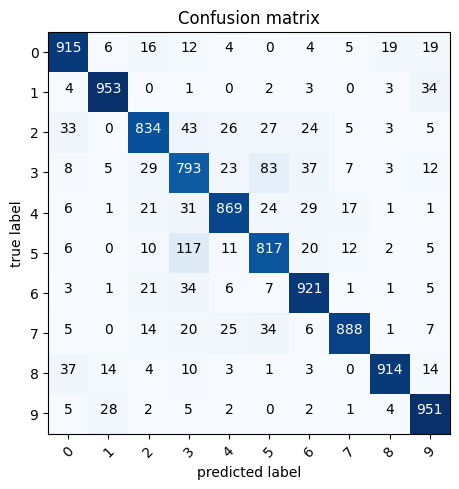

In [14]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("confusion matrix without normalization")
    print(cm)
    
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment= 'center',
                 color = 'white' if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel("true label")
    plt.xlabel('predicted label')
    plt.show()
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [15]:
#label mapping

labels = '''airplane 
autombile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label: horse PredictedL dog')

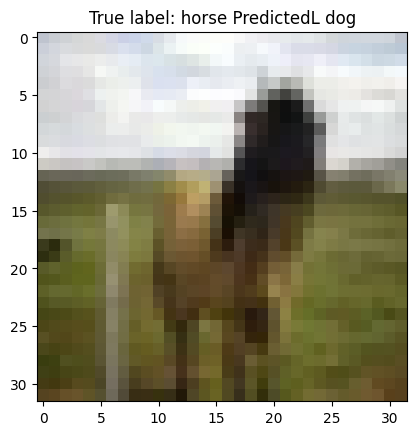

In [16]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s PredictedL %s" % (labels[y_test[i]], labels[p_test[i]]))